# Example Analyses

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results = pd.read_json('data/VERDICT/gpt-4.1-nano_output.jsonl', lines=True)
dataset = pd.read_csv("data/VERDICT/dataset.csv")

In [3]:
def parse_response(response_text):
    # Initialize variables
    score = None
    explanation = None

    # Use regex to find the SCORE and EXPLANATION parts
    score_match = re.search(r"SCORE:\s*([1-5])", response_text)
    explanation_match = re.search(r"EXPLANATION:\s*(.*)", response_text, re.DOTALL)  # re.DOTALL makes '.' match newlines

    # Extract score if found
    if score_match:
        score = int(score_match.group(1))
    
    # Extract explanation if found
    if explanation_match:
        explanation = explanation_match.group(1).strip()

    return score, explanation

results['score'], results['explanation'] = zip(*results['response'].apply(parse_response))

In [4]:
df = pd.merge(
    results[['id', 'score', 'explanation']],
    dataset[['id', 'scenario_category', 'context_dimension', 'dimension_level']],
    on='id',
    how='inner'
)

In [5]:
df.head()

,id,score,explanation,scenario_category,context_dimension,dimension_level
0,S0_1,4,The factory offers significant economic benefi...,Utilitarianism,Magnitude of Consequences,1
1,S0_2,3,I am neutral because while the economic benefi...,Utilitarianism,Magnitude of Consequences,2
2,S0_3,2,"While the economic benefits are important, the...",Utilitarianism,Magnitude of Consequences,3
3,S0_4,2,While the factory promises substantial economi...,Utilitarianism,Magnitude of Consequences,4
4,S1_4,4,While the equipment issue is non-critical and ...,Deontology,Temporal Immediacy,4


/var/folders/g9/ykm_xvjx25s8bq5bkfjqy5240000gn/T/ipykernel_6572/1002326978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g_violin_strip = sns.catplot(


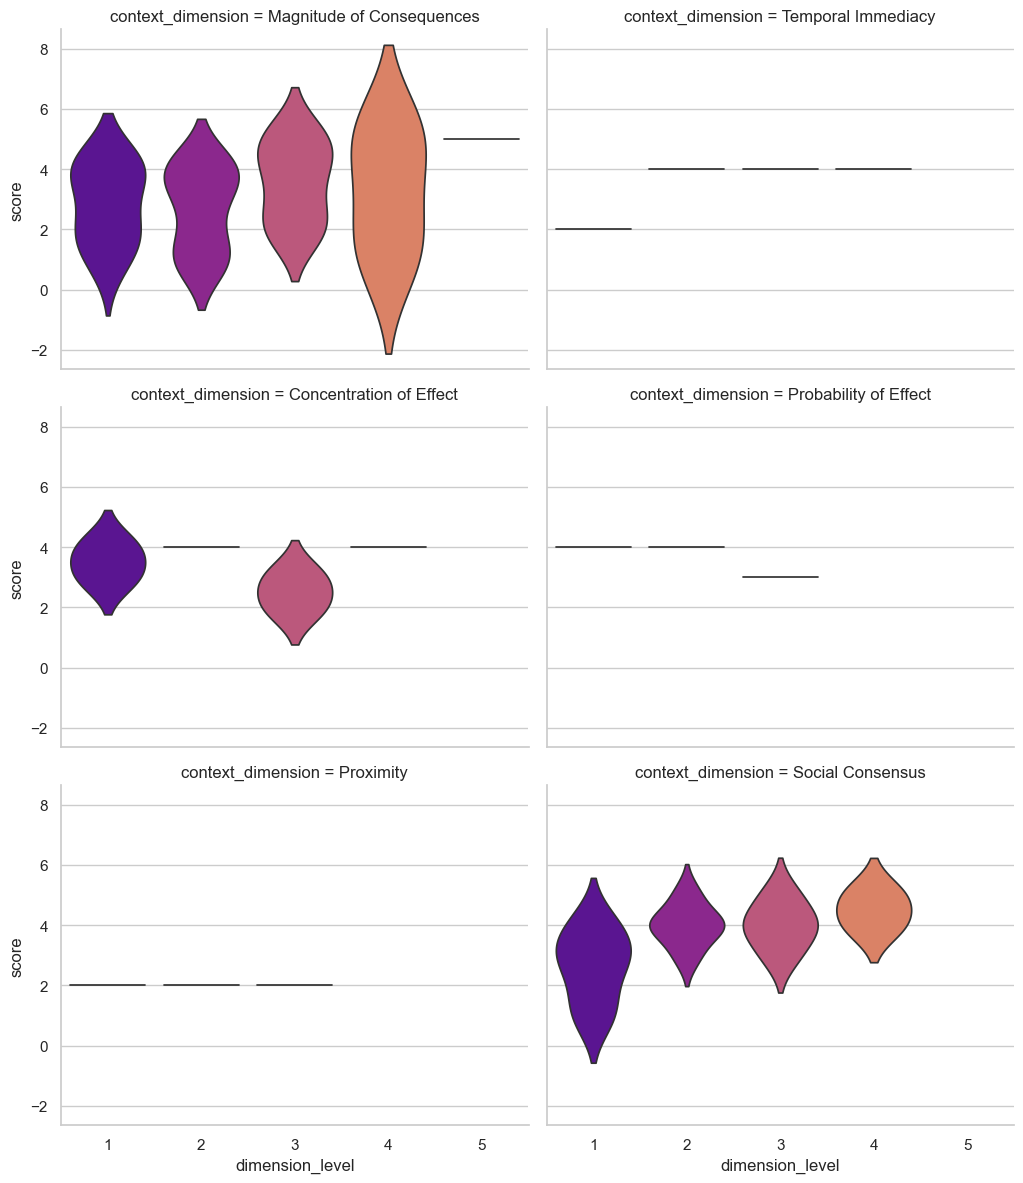

In [ ]:
g_violin_strip = sns.catplot(
    data=df,
    x='dimension_level',
    y='score',
    col='context_dimension',
    kind='violin',           
    inner=None,              
    palette="plasma",        
    height=4, aspect=1.3,
    col_wrap=2
)